In [ ]:
import pandas as pd
import sklearn.ensemble
import seaborn as sns
import numpy as np

In [ ]:
# Get data
import os
import urllib.request

if not os.path.exists('./data/raw/smoking_input.csv') or not os.path.exists('./data/raw/smoking_targets.csv'):
    os.system('mkdir -p data/raw')
    urllib.request.urlretrieve("http://ifestos.cse.sc.edu/datasets/smoking_data.tar.gz", "data/smoking_data.tar.gz")

    os.system('tar -xzvf data/smoking_data.tar.gz -C data/raw/ --strip-components=1')

In [ ]:
# Load data

raw_input = pd.read_csv('data/raw/smoking_input.csv', header=None)
targets = pd.read_csv('data/raw/smoking_targets.csv', header=None)

In [ ]:
# Visualize data

t = targets.copy(deep=True)
t[0] = t[0].apply(lambda x: x+10)
targets_to_plot = t[0].to_numpy()
targets_to_plot = np.reshape(targets_to_plot, [len(targets_to_plot),1])
targets_to_plot = np.pad(targets_to_plot,((0,0),(0,99)), 'mean').flatten()

to_plot = pd.DataFrame()
to_plot['x'] = raw_input.loc[:, 0:99].to_numpy().flatten()
to_plot['y'] = raw_input.loc[:, 100:199].to_numpy().flatten()
to_plot['z'] = raw_input.loc[:, 200:299].to_numpy().flatten()
to_plot['label'] = targets_to_plot

sns.lineplot(to_plot[:500], dashes=None)

In [236]:
# Clean Data
targets.columns = ["labels"]
df = pd.concat([raw_input, targets], axis=1)
df = df.fillna(method='bfill')

In [237]:
# Split data into train and test
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(df.drop(['labels'], axis=1), df['labels'], test_size=0.50, stratify=df['labels'])

In [238]:
# Train Random Forest Classifier

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=3)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [245]:
# Test Classifier

acc = rf.score(X_test, y_test)

0.9560777174067647

<Axes: >

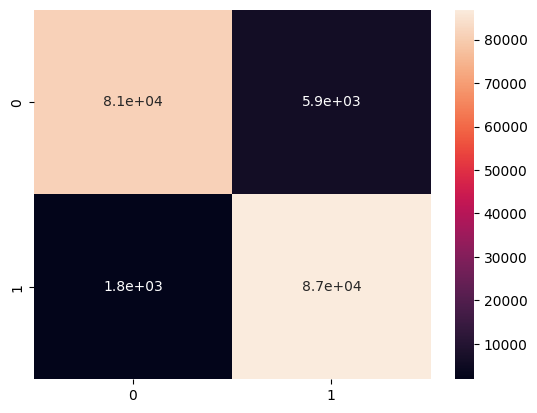

In [259]:
# Heat Map
pred = rf.predict(X_test)

fp = tp = fn = tn = 0

for i,p in enumerate(pred):
    if p == 1:
        if p == y_test.iloc[i]:
            tp += 1
        else:
            fp += 1
    else:   
        if p == y_test.iloc[i]:
            tn += 1
        else:
            fn += 1

sns.heatmap([[tn, fp],[fn, tp]], annot=True)

<Axes: >

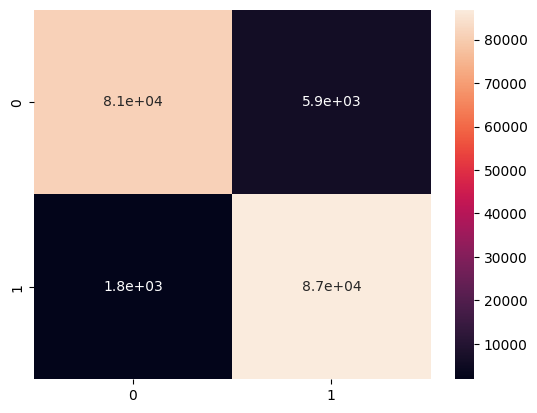

In [258]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)